## Домашнее задание по семинару №11

In [1]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv .

--2022-11-28 14:05:27--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.07s   

2022-11-28 14:05:28 (599 KB/s) - ‘titanic.csv’ saved [44225/44225]

--2022-11-28 14:05:28--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2022-11-28 14:05:28--
Total wall clock time: 0.4s
Downloaded: 1 files, 43K in 0.07s (599 KB/s)


In [2]:
!ls 

sample_data  titanic.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Набор данных включает в себя два CSV-файла. Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).

Каждая строчка наборов данных содержит следующие поля:

* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

* Name — имя;

* Sex — пол;

* Age — возраст;

* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

* Parch — количество родителей, детей (в том числе приемных) на борту титаника;

* Ticket — номер билета;

* Fare — плата за проезд;

* Cabin — каюта;

* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

* Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [4]:
data = pd.read_csv('titanic.csv')
# Посмотрим первые 5 строк из набора данных
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# Выведем несколько столбцов
data[['Survived', 'Name']]

,Survived,Name
0,0,Mr. Owen Harris Braund
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,1,Miss. Laina Heikkinen
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,0,Mr. William Henry Allen
...,...,...
882,0,Rev. Juozas Montvila
883,1,Miss. Margaret Edith Graham
884,0,Miss. Catherine Helen Johnston
885,1,Mr. Karl Howell Behr


In [6]:
# Выведем имена всех колонок
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [7]:
# Проверим тип данных
type(data)

pandas.core.frame.DataFrame

In [8]:
# Посмотрим размер таблицы
data.shape

(887, 8)

In [10]:
# Проверим данные на наличие нулевых элементов
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [11]:
# Выведем типы данных в таблице
data.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [12]:
# Выведем список пассажиров старше 70 лет
data[data['Age']>70]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,0,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000
847,0,3,Mr. Johan Svensson,male,74.0,0,0,7.7750


###Немного статистики

In [13]:
# Медианный возраст пассажиров
data['Age'].mean()

29.471443066516347

In [14]:
# Вычислим дисперсию для данных по возрасту
data['Age'].var()

199.42829701227413

In [15]:
# Вычислим стандартное отклонение
data['Age'].std()

14.12190840546256

In [16]:
# Сводные статистические данные
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [17]:
# Медианные возраст и стоимость проезда
data[['Age', 'Fare']].mean()

Age     29.471443
Fare    32.305420
dtype: float64

### Гистограммы

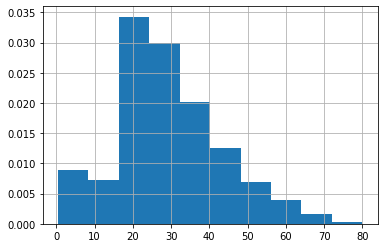

In [18]:
# Выведем соотношение пассажиров по возрасту (density=True выведет долю, а не количество)
data['Age'].hist(density=True) 
# Убедимся, что наибольшее количество пассажиров было в диапазоне от 18 до 40 лет

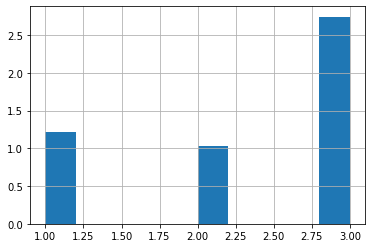

In [19]:
# Посмотрим на соотношение пассажиров по классу
data['Pclass'].hist(density=True)

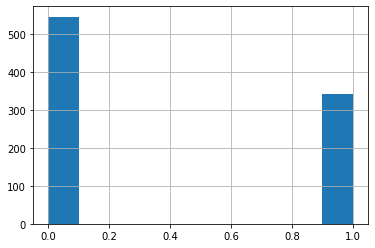

In [20]:
# Отобразим количество выживших на гистограмме
data['Survived'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7dfc75310>,
      dtype=object)

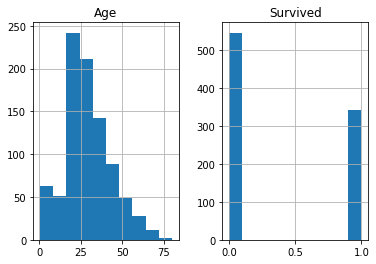

In [21]:
# Выведем две гистограммы рядом.
data[['Age', 'Survived']].hist()

In [22]:
# Посмотрим количество выживших в разрезе половой принадлежности
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Survived, dtype: int64

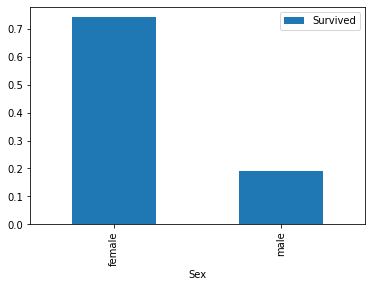

In [23]:
# Отобразим долю выживших в зависимости от половой принадлежности
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()

### Выведем имена всех выживших детей, их возраст и пол.

In [24]:
dataFiltered = data[data['Survived'] == 1]

In [26]:
dataFiltered[dataFiltered['Age']<18][['Name', 'Sex', 'Age']]

,Name,Sex,Age
9,Mrs. Nicholas (Adele Achem) Nasser,female,14.00
10,Miss. Marguerite Rut Sandstrom,female,4.00
22,Miss. Anna McGowan,female,15.00
39,Miss. Jamila Nicola-Yarred,female,14.00
42,Miss. Simonne Marie Anne Andree Laroche,female,3.00
...,...,...,...
826,Mrs. Antoni (Selini Alexander) Yasbeck,female,15.00
827,Master. George Sibley Richards,male,0.83
849,Miss. Mary Conover Lines,female,16.00
865,Master. Harold Theodor Johnson,male,4.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


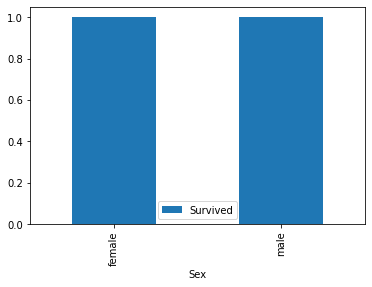

In [27]:
# Отобразим распределение выживших детей в зависимости от пола.
data[data['Survived']==1][data['Age']<18][['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
# Можем наблюдать, что для детей половая принадлежность не являлась значимым фактором. Соотношение схоже для обоих половых групп.